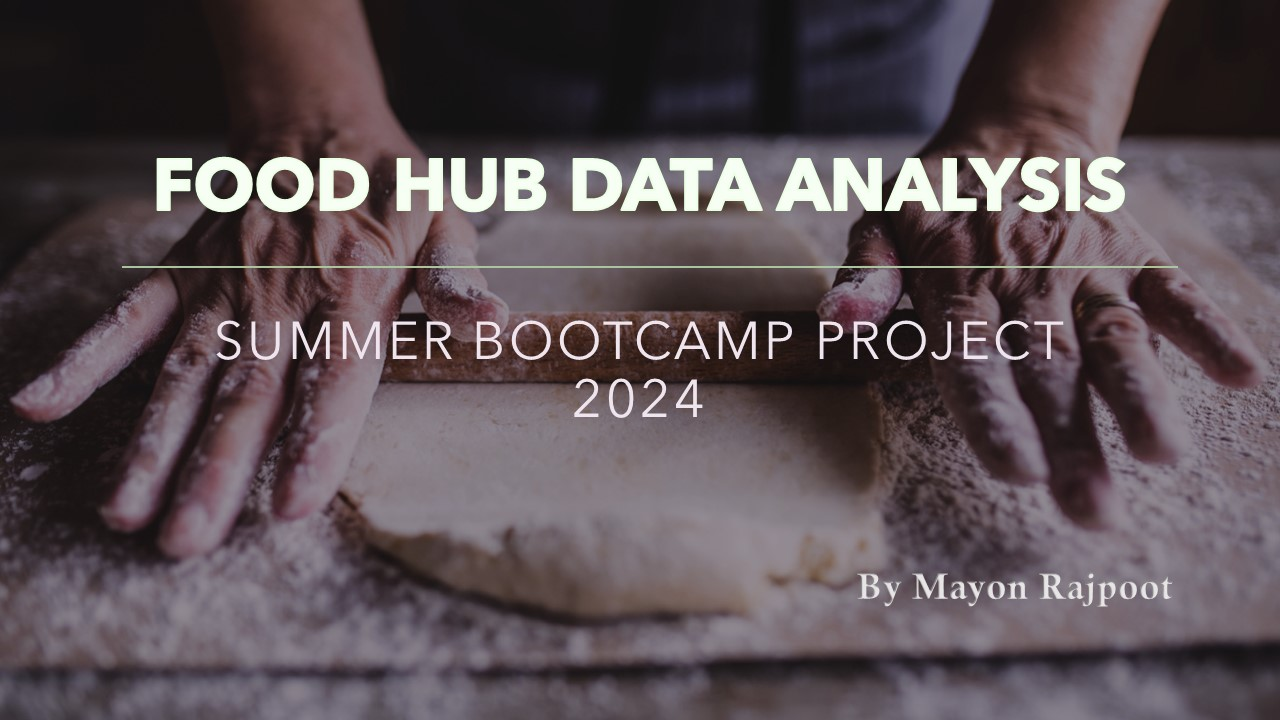

##Data
The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.
##Data Description
The data contains the different data related to a food order. The detailed data dictionary is given below.

Data Dictionary
•	order_id: Unique ID of the order

•	customer_id: ID of the customer who ordered the food

•	restaurant_name: Name of the restaurant

•	cuisine_type: Cuisine ordered by the customer

•	cost: Cost of the order

•	day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)

•	rating: Rating given by the customer out of 5

•	food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.

•	delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information


# **Importing Libraries**


In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Loading csv file**


In [25]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('/content/drive/My Drive/2-foodhub_order_New.csv')
#if local file use:
#data = pd.read_csv(r"\file path\")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Basic Operations**





##**Display the top 5 rows**

In [26]:
print(data.head())

   order_id  customer_id            restaurant_name cuisine_type  \
0   1477147       337525                    Hangawi       Korean   
1   1477685       358141  Blue Ribbon Sushi Izakaya     Japanese   
2   1477070        66393                Cafe Habana      Mexican   
3   1477334       106968  Blue Ribbon Fried Chicken     American   
4   1478249        76942           Dirty Bird to Go     American   

   cost_of_the_order day_of_the_week     rating  food_preparation_time  \
0              30.75         Weekend  Not given                   25.0   
1              12.08         Weekend  Not given                   25.0   
2              12.23         Weekday          5                   23.0   
3              29.20         Weekend          3                   25.0   
4              11.59         Weekday          4                   25.0   

  delivery_time  
0            20  
1             ?  
2            28  
3            15  
4            24  


##**Display the last 5 rows**

In [27]:
print(data.tail())

      order_id  customer_id                        restaurant_name  \
1893   1476701       292602  Chipotle Mexican Grill $1.99 Delivery   
1894   1477421       397537                              The Smile   
1895   1477819        35309                      Blue Ribbon Sushi   
1896   1477513        64151                      Jack's Wife Freda   
1897   1478056       120353                      Blue Ribbon Sushi   

       cuisine_type  cost_of_the_order day_of_the_week     rating  \
1893        Mexican              22.31         Weekend          5   
1894       American              12.18         Weekend          5   
1895       Japanese              25.22         Weekday  Not given   
1896  Mediterranean              12.18         Weekday          5   
1897       Japanese              19.45         Weekend  Not given   

      food_preparation_time delivery_time  
1893                   31.0            17  
1894                   31.0            19  
1895                   31.0     

##**Check the shape of dataset**

In [28]:
print("Shape of the dataset:", data.shape)

Shape of the dataset: (1898, 9)


##**Check the datatypes of each feature**

In [29]:
print("Data types of each column:", data.dtypes)

Data types of each column: order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time    float64
delivery_time             object
dtype: object


##**Check the Statistical summary**

In [30]:
print("Statistical summary:\n")
print(data.describe())

Statistical summary:

           order_id    customer_id  cost_of_the_order  food_preparation_time
count  1.898000e+03    1898.000000        1898.000000            1896.000000
mean   1.477496e+06  171168.478398          80.722007              27.371835
std    5.480497e+02  113698.139743        2798.141333               4.634211
min    1.476547e+06    1311.000000           0.000000              20.000000
25%    1.477021e+06   77787.750000          12.080000              23.000000
50%    1.477496e+06  128600.000000          14.160000              27.000000
75%    1.477970e+06  270525.000000          22.310000              31.000000
max    1.478444e+06  405334.000000      121920.000000              35.000000


##**Check the null values**

In [31]:
print("Null values in each column:\n")
print(data.isnull().sum())

Null values in each column:

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             3
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    2
delivery_time            0
dtype: int64


##**Check the duplicate values**

In [32]:
print("Number of duplicate rows:", data.duplicated().sum())

Number of duplicate rows: 0


##**Check the anomalies or wrong entries**

In [33]:
# Check for anomalies or wrong entries
# For this, we will focus on columns where anomalies are likely.
# Replace column names to match with given names
data = data.rename(columns={
    'cost_of_the_order': 'cost',
    'food_preparation_time': 'food_preparation_time',
    'delivery_time': 'delivery_time',
    'rating': 'rating'
})

# Function to check if a value is numeric
def is_numeric(val):
    try:
        float(val)
        return True
    except ValueError:
        return False

# Create a DataFrame to store anomalies
anomalies = pd.DataFrame()

# Check delivery_time for non-numeric values and outliers
anomalies['delivery_time'] = data['delivery_time'].apply(lambda x: not is_numeric(x) or (is_numeric(x) and float(x) < 0))

# Check food_preparation_time for non-numeric values and outliers
anomalies['food_preparation_time'] = data['food_preparation_time'].apply(lambda x: not is_numeric(x) or (is_numeric(x) and float(x) < 0))

# Check cost for non-numeric values and outliers
anomalies['cost'] = data['cost'].apply(lambda x: not is_numeric(x) or (is_numeric(x) and float(x) < 0))

# Check rating for non-numeric values and outliers (assuming rating should be between 1 and 5)
anomalies['rating'] = data['rating'].apply(lambda x: not is_numeric(x) or (is_numeric(x) and not (1 <= float(x) <= 5)))

# Combine the anomalies with the original data for context
anomalies_with_data = data[anomalies.any(axis=1)].copy()
anomalies_with_data['anomalies'] = anomalies.apply(lambda row: ', '.join(anomalies.columns[row]), axis=1)

# Display rows with anomalies and the specific anomalies detected
print(anomalies_with_data[['order_id', 'delivery_time', 'food_preparation_time', 'cost', 'rating', 'anomalies']])
print()

      order_id delivery_time  food_preparation_time   cost     rating  \
0      1477147            20                   25.0  30.75  Not given   
1      1477685             ?                   25.0  12.08  Not given   
6      1477894            21                   28.0   6.07  Not given   
10     1477895            28                   34.0   5.92  Not given   
14     1478198            30                   23.0  12.13  Not given   
...        ...           ...                    ...    ...        ...   
1887   1476873            30                   26.0   5.82  Not given   
1891   1476981            28                   22.0   5.82  Not given   
1892   1477473            21                   29.0  29.15  Not given   
1895   1477819            24                   31.0  25.22  Not given   
1897   1478056            24                   28.0  19.45  Not given   

                  anomalies  
0                    rating  
1     delivery_time, rating  
6                    rating  
10 

##**Check the outliers and their authenticity**

      order_id delivery_time  food_preparation_time   cost     rating  \
0      1477147            20                   25.0  30.75  Not given   
1      1477685             ?                   25.0  12.08  Not given   
6      1477894            21                   28.0   6.07  Not given   
10     1477895            28                   34.0   5.92  Not given   
14     1478198            30                   23.0  12.13  Not given   
...        ...           ...                    ...    ...        ...   
1887   1476873            30                   26.0   5.82  Not given   
1891   1476981            28                   22.0   5.82  Not given   
1892   1477473            21                   29.0  29.15  Not given   
1895   1477819            24                   31.0  25.22  Not given   
1897   1478056            24                   28.0  19.45  Not given   

                  anomalies  
0                    rating  
1     delivery_time, rating  
6                    rating  
10 

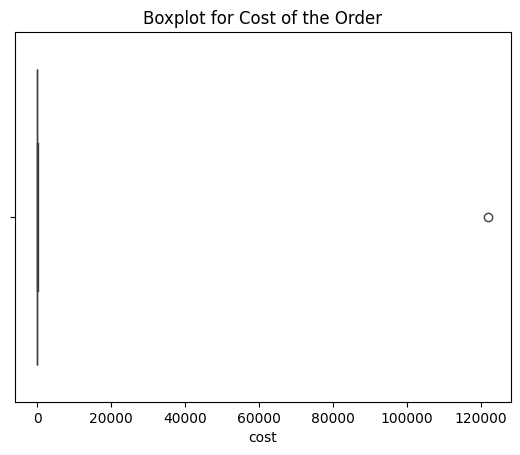

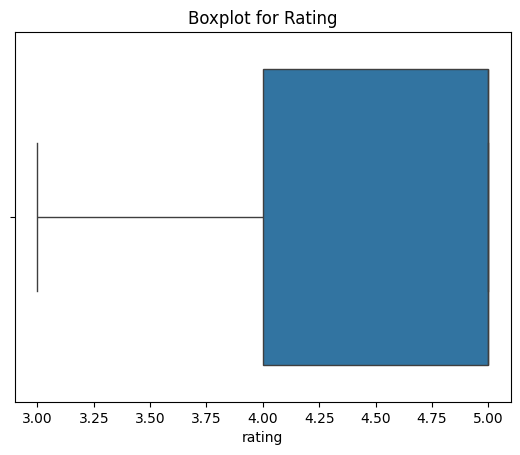

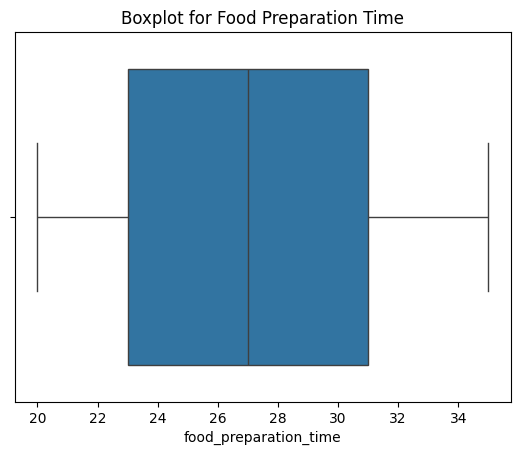

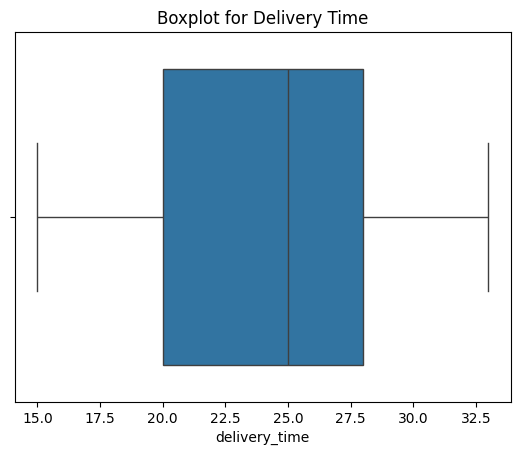

In [34]:
# Create a DataFrame to store anomalies
anomalies = pd.DataFrame()

# Check delivery_time for non-numeric values and outliers
anomalies['delivery_time'] = data['delivery_time'].apply(lambda x: not is_numeric(x) or (is_numeric(x) and float(x) < 0))

# Check food_preparation_time for non-numeric values and outliers
anomalies['food_preparation_time'] = data['food_preparation_time'].apply(lambda x: not is_numeric(x) or (is_numeric(x) and float(x) < 0))

# Check cost for non-numeric values and outliers
anomalies['cost'] = data['cost'].apply(lambda x: not is_numeric(x) or (is_numeric(x) and float(x) < 0))

# Check rating for non-numeric values and outliers (assuming rating should be between 1 and 5)
anomalies['rating'] = data['rating'].apply(lambda x: not is_numeric(x) or (is_numeric(x) and not (1 <= float(x) <= 5)))

# Combine the anomalies with the original data for context
anomalies_with_data = data[anomalies.any(axis=1)].copy()
anomalies_with_data['anomalies'] = anomalies.apply(lambda row: ', '.join(anomalies.columns[row]), axis=1)

# Display rows with anomalies and the specific anomalies detected
print(anomalies_with_data[['order_id', 'delivery_time', 'food_preparation_time', 'cost', 'rating', 'anomalies']])
print()
# Plot boxplot for 'cost' to detect outliers if the column exists
if 'cost' in data.columns:
    sns.boxplot(x=data['cost'])
    plt.title('Boxplot for Cost of the Order')
    plt.show()

# Plot boxplot for 'rating' to detect outliers if the column exists
if 'rating' in data.columns:
    sns.boxplot(x=pd.to_numeric(data['rating'], errors='coerce').dropna())
    plt.title('Boxplot for Rating')
    plt.show()

# Plot boxplot for 'food_preparation_time' to detect outliers if the column exists
if 'food_preparation_time' in data.columns:
    sns.boxplot(x=data['food_preparation_time'])
    plt.title('Boxplot for Food Preparation Time')
    plt.show()

# Plot boxplot for 'delivery_time' to detect outliers if the column exists
if 'delivery_time' in data.columns:
    sns.boxplot(x=pd.to_numeric(data['delivery_time'], errors='coerce').dropna())
    plt.title('Boxplot for Delivery Time')
    plt.show()

##**Data Cleaning**

In [35]:
# Drop unnecessary columns (assuming 'order_id' and 'customer_id' are unnecessary for the analysis)
data_cleaned = data.drop(columns=['order_id', 'customer_id'], errors='ignore')

In [36]:
# Drop duplicates
data_cleaned = data_cleaned.drop_duplicates()


In [37]:
# Convert rating to numeric, setting errors='coerce' to NaN for non-numeric values
data_cleaned['rating'] = pd.to_numeric(data_cleaned['rating'], errors='coerce')
data_cleaned['rating'].fillna(data_cleaned['rating'].median(), inplace=True)

# Impute missing values with the median or a relevant value
data_cleaned['delivery_time'] = pd.to_numeric(data_cleaned['delivery_time'], errors='coerce')
data_cleaned['delivery_time'].fillna(data_cleaned['delivery_time'].median(), inplace=True)

data_cleaned['food_preparation_time'].fillna(data_cleaned['food_preparation_time'].median(), inplace=True)
data_cleaned['cost'].fillna(data_cleaned['cost'].median(), inplace=True)
data_cleaned['rating'].fillna(data_cleaned['rating'].median(), inplace=True)

In [38]:
# Treat outliers using IQR method
def treat_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return column.clip(lower=lower_bound, upper=upper_bound)

data_cleaned['delivery_time'] = treat_outliers(data_cleaned['delivery_time'])
data_cleaned['food_preparation_time'] = treat_outliers(data_cleaned['food_preparation_time'])
data_cleaned['cost'] = treat_outliers(data_cleaned['cost'])
data_cleaned['rating'] = treat_outliers(data_cleaned['rating'])


In [39]:
# Print the cleaned data
print(data_cleaned.head())

             restaurant_name cuisine_type   cost day_of_the_week  rating  \
0                    Hangawi       Korean  30.75         Weekend     5.0   
1  Blue Ribbon Sushi Izakaya     Japanese  12.08         Weekend     5.0   
2                Cafe Habana      Mexican  12.23         Weekday     5.0   
3  Blue Ribbon Fried Chicken     American  29.20         Weekend     3.0   
4           Dirty Bird to Go     American  11.59         Weekday     4.0   

   food_preparation_time  delivery_time  
0                   25.0           20.0  
1                   25.0           25.0  
2                   23.0           28.0  
3                   25.0           15.0  
4                   25.0           24.0  


#Order Analysis

##**What is the total number of orders in the dataset?**

In [40]:
# Total number of orders
total_orders = data_cleaned.shape[0]
print(f"Total number of orders: {total_orders}")

Total number of orders: 1898


##**What is the average cost of an order?**


In [41]:
# Average cost of an order
average_cost = data_cleaned['cost'].mean()
print(f"Average cost of an order: ${average_cost:.2f}")

Average cost of an order: $16.51


##**How many unique customers have placed orders?**

In [42]:
# Number of unique customers
unique_customers = data['customer_id'].nunique()
print(f"Number of unique customers: {unique_customers}")

Number of unique customers: 1200


##**Which restaurant has received the highest number of orders?**

In [43]:
# Restaurant with the highest number of orders
most_orders_restaurant = data_cleaned['restaurant_name'].value_counts().idxmax()
most_orders_count = data_cleaned['restaurant_name'].value_counts().max()
print(f"Restaurant with the highest number of orders: {most_orders_restaurant} ({most_orders_count} orders)")

Restaurant with the highest number of orders: Shake Shack (219 orders)


#Customer Behaviour

##What is the average rating given by customers?

In [44]:
# Average rating given by customers
average_rating = data_cleaned['rating'].mean()
print(f"Average rating given by customers: {average_rating:.2f}")

Average rating given by customers: 4.60


##How does the rating vary between weekdays and weekends?

In [45]:
# Determine weekdays and weekends based on 'day_of_the_week'
# Assuming 'Saturday' and 'Sunday' as weekends
weekends = ['Saturday', 'Sunday']
data_cleaned['is_weekend'] = data_cleaned['day_of_the_week'].apply(lambda x: x in weekends)

# Average rating for weekdays and weekends
average_weekday_rating = data_cleaned[data_cleaned['is_weekend'] == False]['rating'].mean()
average_weekend_rating = data_cleaned[data_cleaned['is_weekend'] == True]['rating'].mean()
print(f"Average rating on weekdays: {average_weekday_rating:.2f}")
print(f"Average rating on weekends: {average_weekend_rating:.2f}")

Average rating on weekdays: 4.60
Average rating on weekends: nan


##Which cuisine type is ordered the most?

In [46]:
# Cuisine type ordered the most
most_ordered_cuisine = data_cleaned['cuisine_type'].value_counts().idxmax()
print(f"Cuisine type ordered the most: {most_ordered_cuisine}")

Cuisine type ordered the most: American


##What is the distribution of orders across different days of the week?

In [47]:
# Distribution of orders across different days of the week
orders_distribution = data_cleaned['day_of_the_week'].value_counts()
print("Distribution of orders across different days of the week:")
print(orders_distribution)

Distribution of orders across different days of the week:
day_of_the_week
Weekend    1351
Weekday     547
Name: count, dtype: int64


#Restaurant Performance

##What is the average food preparation time for each restaurant?

In [48]:
# Calculate average food preparation time for each restaurant
avg_prep_time = data_cleaned.groupby('restaurant_name')['food_preparation_time'].mean().reset_index()

# Print the results
print("Average food preparation time for each restaurant:")
print(avg_prep_time)
print()


Average food preparation time for each restaurant:
      restaurant_name  food_preparation_time
0          'wichcraft              28.000000
1           12 Chairs              27.000000
2     5 Napkin Burger              30.200000
3           67 Burger              20.000000
4             Alidoro              34.000000
..                ...                    ...
173    Zero Otto Nove              30.000000
174              brgr              25.000000
175        da Umberto              24.333333
176  ilili Restaurant              26.388889
177         indikitch              30.750000

[178 rows x 2 columns]



##Which restaurant has the shortest average food preparation time?

In [49]:
# Find the restaurant with the shortest average food preparation time
shortest_prep_time_restaurant = avg_prep_time.loc[avg_prep_time['food_preparation_time'].idxmin()]

# Print the restaurant with the shortest average food preparation time
print(f"Restaurant with the shortest average food preparation time: {shortest_prep_time_restaurant['restaurant_name']} "
      f"(Average time: {shortest_prep_time_restaurant['food_preparation_time']:.2f} minutes)")
print()


Restaurant with the shortest average food preparation time: 67 Burger (Average time: 20.00 minutes)



##How does the average delivery time compare across different restaurants?

In [50]:
# Calculate average delivery time for each restaurant
avg_delivery_time = data_cleaned.groupby('restaurant_name')['delivery_time'].mean().reset_index()

# Print the results
print("Average delivery time across different restaurants:")
print(avg_delivery_time)
print()


Average delivery time across different restaurants:
      restaurant_name  delivery_time
0          'wichcraft      28.000000
1           12 Chairs      27.750000
2     5 Napkin Burger      24.400000
3           67 Burger      28.000000
4             Alidoro      22.000000
..                ...            ...
173    Zero Otto Nove      21.500000
174              brgr      25.000000
175        da Umberto      28.000000
176  ilili Restaurant      24.888889
177         indikitch      25.500000

[178 rows x 2 columns]



##Is there a correlation between the cost of the order and the rating given?

In [51]:
# Calculate correlation between 'cost' and 'rating'
correlation = data_cleaned['cost'].corr(data_cleaned['rating'])

# Print the correlation coefficient
print(f"Correlation between cost of order and rating given: {correlation:.2f}")
print()


Correlation between cost of order and rating given: -0.00



#Demand Patterns

##How does the demand for different cuisine types vary on weekdays versur weekends?

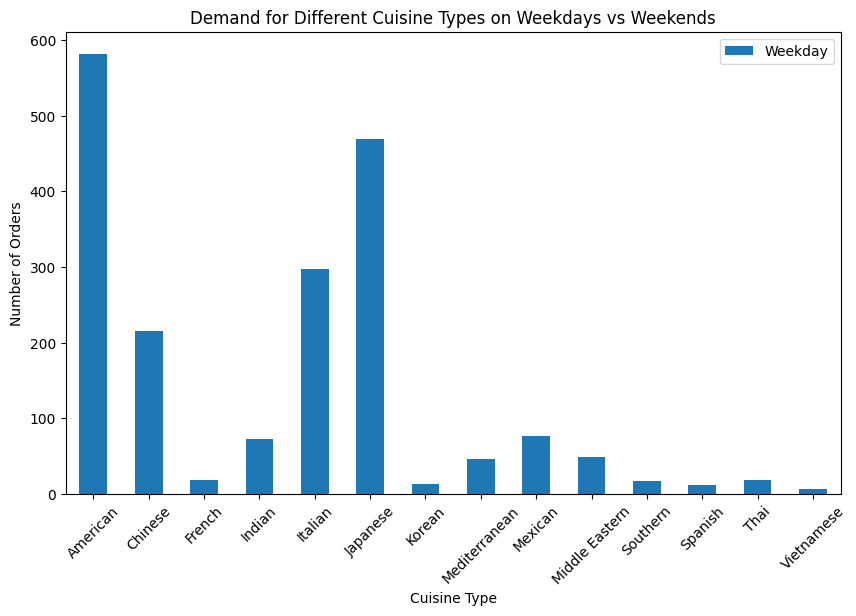

In [52]:
# Calculate demand for different cuisine types on weekdays and weekends
demand_by_cuisine = data_cleaned.groupby(['cuisine_type', 'is_weekend']).size().unstack(fill_value=0)

# Plotting stacked bar chart
demand_by_cuisine.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Demand for Different Cuisine Types on Weekdays vs Weekends')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(['Weekday', 'Weekend'])
plt.show()

##Which day of the week has the highest average order cost?

In [53]:
# Calculate average order cost for each day of the week
avg_order_cost_by_day = data_cleaned.groupby('day_of_the_week')['cost'].mean().reset_index()

# Find the day with the highest average order cost
highest_avg_cost_day = avg_order_cost_by_day.loc[avg_order_cost_by_day['cost'].idxmax()]

# Print the day with the highest average order cost
print(f"Day of the week with the highest average order cost: {highest_avg_cost_day['day_of_the_week']} "
      f"(Average cost: ${highest_avg_cost_day['cost']:.2f})")
print()


Day of the week with the highest average order cost: Weekend (Average cost: $16.58)



##What is the most common day for orders to be placed?

In [54]:
# Find the most common day for orders to be placed
most_common_day = data_cleaned['day_of_the_week'].mode()[0]

# Count occurrences of the most common day
most_common_day_count = data_cleaned['day_of_the_week'].value_counts().max()

# Print the most common day for orders
print(f"Most common day for orders to be placed: {most_common_day} "
      f"({most_common_day_count} orders)")
print()


Most common day for orders to be placed: Weekend (1351 orders)



##How does the average rating vary by cuisine type?

<ipython-input-55-f404e6493a3f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cuisine_type', y='rating', data=avg_rating_by_cuisine, palette='viridis')


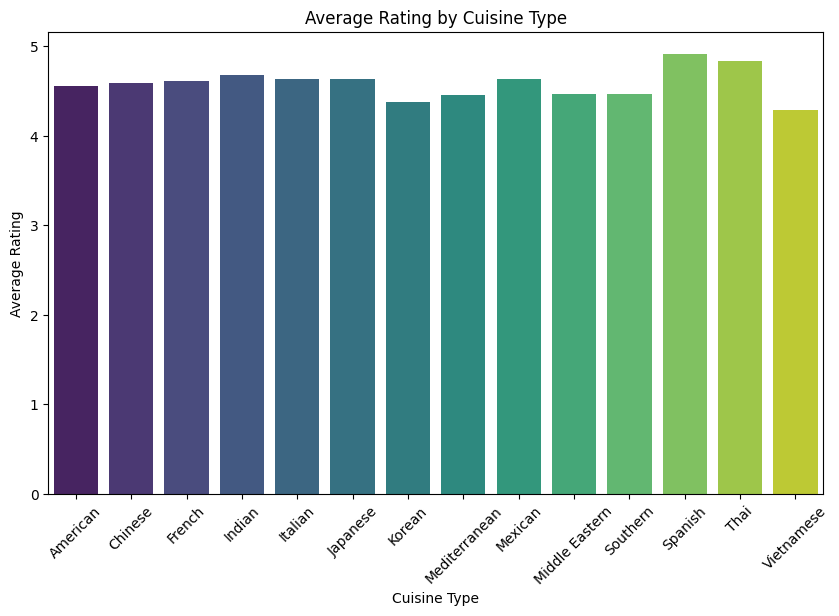

In [55]:
# Calculate average rating for each cuisine type
avg_rating_by_cuisine = data_cleaned.groupby('cuisine_type')['rating'].mean().reset_index()

# Plotting bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='cuisine_type', y='rating', data=avg_rating_by_cuisine, palette='viridis')
plt.title('Average Rating by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()


#Operational Efficiency

##What is the average delivery time for all orders?

In [56]:
# Calculate the average delivery time for all orders
avg_delivery_time = data_cleaned['delivery_time'].mean()

# Print the average delivery time
print(f"Average delivery time for all orders: {avg_delivery_time:.2f} minutes")
print()


Average delivery time for all orders: 24.16 minutes



##Which restaurant has the longest average delivery time?

In [57]:
# Calculate average delivery time for each restaurant
avg_delivery_time_by_restaurant = data_cleaned.groupby('restaurant_name')['delivery_time'].mean().reset_index()

# Find the restaurant with the longest average delivery time
restaurant_longest_delivery = avg_delivery_time_by_restaurant.loc[avg_delivery_time_by_restaurant['delivery_time'].idxmax()]

# Print the restaurant with the longest average delivery time
print(f"Restaurant with the longest average delivery time: {restaurant_longest_delivery['restaurant_name']} "
      f"(Average delivery time: {restaurant_longest_delivery['delivery_time']:.2f} minutes)")
print()


Restaurant with the longest average delivery time: Sarabeth's West (Average delivery time: 33.00 minutes)



##Is there a relationship between food preparation time and delivery time?

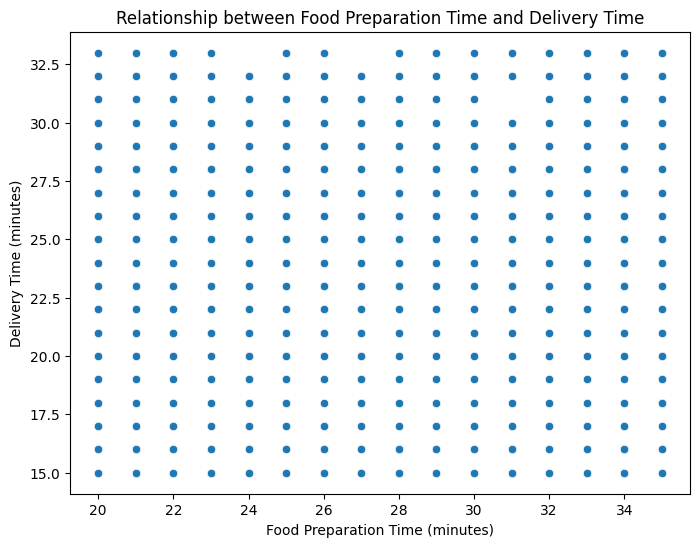

In [58]:
# Scatter plot to visualize the relationship between food preparation time and delivery time
plt.figure(figsize=(8, 6))
sns.scatterplot(x='food_preparation_time', y='delivery_time', data=data_cleaned)
plt.title('Relationship between Food Preparation Time and Delivery Time')
plt.xlabel('Food Preparation Time (minutes)')
plt.ylabel('Delivery Time (minutes)')
plt.show()


##How does the delivery time impact customer ratings?

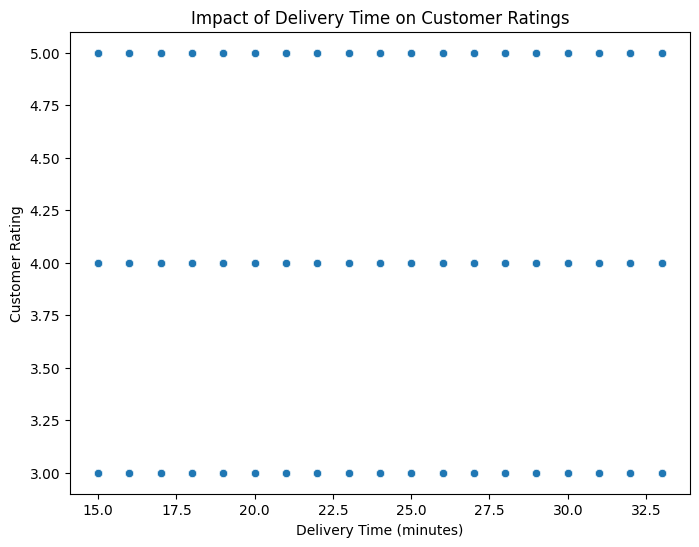

In [59]:
# Scatter plot to visualize the impact of delivery time on customer ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(x='delivery_time', y='rating', data=data_cleaned)
plt.title('Impact of Delivery Time on Customer Ratings')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Customer Rating')
plt.show()


#Customer Insights

##What is the repeat order rate (number of customers who have placed more than one order)?

In [61]:
# Calculate the number of customers who have placed more than one order
repeat_customers = data.groupby('customer_id')['order_id'].nunique()
repeat_order_rate = (repeat_customers > 1).sum() / data['customer_id'].nunique()

# Print the repeat order rate
print(f"Repeat order rate (customers who have placed more than one order): {repeat_order_rate}")
print()

Repeat order rate (customers who have placed more than one order): 0.3466666666666667



##What percentage of orders receive a rating of 4 or higher?

In [62]:
# Calculate the percentage of orders that receive a rating of 4 or higher
high_rating_orders = data_cleaned[data_cleaned['rating'] >= 4]
percentage_high_rating = (len(high_rating_orders) / len(data_cleaned)) * 100

# Print the percentage of orders with rating 4 or higher
print(f"Percentage of orders with rating 4 or higher: {percentage_high_rating:.2f}%")
print()


Percentage of orders with rating 4 or higher: 90.09%

